In [ ]:
!pip install shap
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e77919b3c033a39af105b5990006e2da2ef30f4190262391201aaff9df7fe1b6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import shap
import lime
import sklearn
import shap
shap.initjs() # load JS visualization code to notebook
import xgboost
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Import the library
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("mstz/heloc")

# Convert the 'train' split to a Pandas DataFrame
df = dataset['train'].to_pandas()

# Display the first few rows
print(df.head())

# Save locally if needed
df.to_csv("heloc.csv", index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.65k [00:00<?, ?B/s]

heloc.py:   0%|          | 0.00/5.53k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/307k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10459 [00:00<?, ? examples/s]

   estimate_of_risk  months_since_first_trade  months_since_last_trade  \
0                55                       144                        4   
1                61                        58                       15   
2                67                        66                        5   
3                66                       169                        1   
4                81                       333                       27   

   average_duration_of_resolution  number_of_satisfactory_trades  \
0                              84                             20   
1                              41                              2   
2                              24                              9   
3                              73                             28   
4                             132                             12   

   nr_trades_insolvent_for_over_60_days  nr_trades_insolvent_for_over_90_days  \
0                                     3                          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the HELOC dataset
df1 = pd.read_csv("heloc_dataset.csv")
df1.head()


RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                      83                     2  ...                    43   
1                     100                    -7  ...                    67   
2                     100                    -7  ...                    44   
3                      93                    76  ...                    57   
4                     100                    -7  ...                    25   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  
3                                   3                     91  
4                                   0                     80  

[5 rows x 24 columns]

In [ ]:
# Data Cleaning and Preprocessing
# 1. Replace special values with NaN
special_values = [-9, -8, -7]
df1 = df1.replace(special_values, np.nan)

# 2. Impute missing values using SimpleImputer
num_imputer = SimpleImputer(strategy='mean')  # For numerical features
# Apply imputation to numerical columns (excluding 'RiskPerformance' if it's your target)
numeric_cols = df1.select_dtypes(include=['number']).columns.difference(['RiskPerformance'])
for col in numeric_cols:
    df1[col] = num_imputer.fit_transform(df1[[col]]).ravel()

# 3. Convert target variable to binary (if needed)
df1['RiskPerformance'] = df1['RiskPerformance'].map({'Good': 1, 'Bad': 0})

# 4. Feature scaling (using StandardScaler)
# Assuming 'RiskPerformance' is your target variable and other columns are features
y = df1['RiskPerformance']
X = df1.drop('RiskPerformance', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Now, X contains the preprocessed features, and y contains the target variable

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

In [ ]:


xgb_final = XGBClassifier(tree_method = 'hist',
                         n_estimators = 800,
                         min_child_weight = 6,
                         max_depth = 2,
                         gamma = 0,
                         eta = 0.4,
                         early_stop=10,
                         random_state = 42)
xgb_final.fit(X_train_array, y_train_array)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:16:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "early_stop" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stop=10,
              early_stopping_rounds=None, enable_categorical=False, eta=0.4,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, ...)

In [ ]:
def model_eval(model, title, test_features, test_labels):
    scores = pd.DataFrame()
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    roc_auc = roc_auc_score(test_labels,predictions)
    F1 = f1_score(test_labels,predictions)
    precision = precision_score(test_labels,predictions)
    recall = recall_score(test_labels,predictions)
    scores[title] = [accuracy,roc_auc,F1,precision,recall]
    scores.index = ['Accuracy Score', 'ROC_AUC', 'F1_Score', 'Precision_Score','Recall_Score']
    return scores
train_scores = model_eval(xgb_final,"train",X_train_array,y_train_array)
test_scores = model_eval(xgb_final, "test",X_test_array, y_test_array)
print(train_scores)
print(test_scores)

                    train
Accuracy Score   0.821919
ROC_AUC          0.820482
F1_Score         0.808778
Precision_Score  0.831618
Recall_Score     0.787160
                     test
Accuracy Score   0.726577
ROC_AUC          0.725707
F1_Score         0.711403
Precision_Score  0.715736
Recall_Score     0.707121


In [ ]:
# LightGBM Model
lgbm_model = LGBMClassifier(tree_method = 'hist',
                         n_estimators = 800,
                         min_child_weight = 6,
                         max_depth = 2,
                         gamma = 0,
                         eta = 0.4,
                         early_stop=10,
                         random_state = 42)

lgbm_model.fit(X_train_array, y_train_array)


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: early_stop
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: early_stop
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Number of positive: 4003, number of negative: 4364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1479
[LightGBM] [Info] Number of data points in the train set: 8367, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478427 -> initscore=-

LGBMClassifier(early_stop=10, eta=0.4, gamma=0, max_depth=2, min_child_weight=6,
               n_estimators=800, random_state=42, tree_method='hist')

In [ ]:
def model_eval(model, title, test_features, test_labels):
    scores = pd.DataFrame()
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    roc_auc = roc_auc_score(test_labels,predictions)
    F1 = f1_score(test_labels,predictions)
    precision = precision_score(test_labels,predictions)
    recall = recall_score(test_labels,predictions)
    scores[title] = [accuracy,roc_auc,F1,precision,recall]
    scores.index = ['Accuracy Score', 'ROC_AUC', 'F1_Score', 'Precision_Score','Recall_Score']
    return scores
train_scores = model_eval(lgbm_model,"train",X_train_array,y_train_array)
test_scores = model_eval(lgbm_model, "test",X_test_array, y_test_array)
print(train_scores)
print(test_scores)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: early_stop
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: early_stop
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
                    train
Accuracy Score   0.764671
ROC_AUC          0.762625
F1_Score         0.744120
Precision_Score  0.775460
Recall_Score     0.715214
                     test
Accuracy Score   0.731836
ROC_AUC          0.730640
F1_Score         0.714794
Precision_Score  0.724742
Recall_Score     0.705115


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal

# Define the encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, condition_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim + condition_dim, 128)
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)

    def forward(self, x, condition):
        x = torch.cat((x, condition), dim=1)  # Concatenate condition
        h = F.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

# Define the decoder
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + condition_dim, 128)
        self.fc_out = nn.Linear(128, output_dim)

    def forward(self, z, condition):
        z = torch.cat((z, condition), dim=1)  # Concatenate condition
        h = F.relu(self.fc1(z))
        x_recon = torch.sigmoid(self.fc_out(h))
        return x_recon

# Define the VAE
class CCHVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, condition_dim):
        super(CCHVAE, self).__init__()
        self.encoder = Encoder(input_dim, latent_dim, condition_dim)
        self.decoder = Decoder(latent_dim, input_dim, condition_dim)

    def forward(self, x, condition):
        mu, logvar = self.encoder(x, condition)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)  # Reparameterization trick
        z = mu + eps * std
        x_recon = self.decoder(z, condition)
        return x_recon, mu, logvar

# Loss Function
def loss_function(recon_x, x, mu, logvar):
    recon_loss = F.binary_cross_entropy(recon_x, x, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_divergence

# Training Loop
def train_model(model, dataloader, optimizer, epochs, condition_dim):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x, condition in dataloader:
            optimizer.zero_grad()
            x_recon, mu, logvar = model(x, condition)
            loss = loss_function(x_recon, x, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader.dataset):.4f}")

# Example Usage
input_dim = 784  # Example for MNIST
latent_dim = 20
condition_dim = 10  # Example condition vector
model = CCHVAE(input_dim, latent_dim, condition_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# Assume dataloader is defined and prepared with (input, condition)
# train_model(model, dataloader, optimizer, epochs=10, condition_dim=condition_dim)


In [ ]:
import numpy as np
from xgboost import XGBClassifier
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming the CCHVAE model is already implemented as above
# Define some constants for your data
input_dim = X_train_array.shape[1]
latent_dim = 20
condition_dim = 1  # Assuming binary classification for simplicity

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32).unsqueeze(1)

# Initialize C-CHVAE model
cchvae = CCHVAE(input_dim, latent_dim, condition_dim)
optimizer = torch.optim.Adam(cchvae.parameters(), lr=1e-3)

# Prepare DataLoader
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Training the C-CHVAE
epochs = 10
for epoch in range(epochs):
    cchvae.train()
    total_loss = 0
    for x, y in dataloader:
        optimizer.zero_grad()
        x_recon, mu, logvar = cchvae(x, y)  # Condition on y
        loss = loss_function(x_recon, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader.dataset):.4f}")

# Generating Latent Features
cchvae.eval()
with torch.no_grad():
    mu_train, _ = cchvae.encoder(X_train_tensor, y_train_tensor)
    X_train_latent = mu_train.numpy()  # Latent representation for training
    mu_test, _ = cchvae.encoder(torch.tensor(X_test_array, dtype=torch.float32),
                                 torch.tensor(y_test_array, dtype=torch.float32).unsqueeze(1))
    X_test_latent = mu_test.numpy()   # Latent representation for testing

# Train XGBoost Classifier on Latent Features
xgb_final = XGBClassifier(tree_method='hist',
                          n_estimators=800,
                          min_child_weight=6,
                          max_depth=2,
                          gamma=0,
                          eta=0.4,
                          random_state=42)

xgb_final.fit(X_train_latent, y_train_array)

# Evaluate on Test Data
y_pred = xgb_final.predict(X_test_latent)
print("Accuracy:", np.mean(y_pred == y_test_array))


RuntimeError: all elements of target should be between 0 and 1

In [ ]:
# Assuming your dataframe is called df
# Separate the target variable 'RiskPerformance' from the features
X_train_array = df1


In [ ]:
print(X_train_array.columns)


Index(['ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')


In [ ]:
lgbm_model = LGBMClassifier(
    tree_method='hist',
    n_estimators=800,
    min_child_weight=6,
    max_depth=2,
    gamma=0,
    eta=0.4,
    early_stopping_rounds=10,  # use 'early_stopping_rounds' instead of 'early_stop'
    random_state=42
)
lgbm_model.fit(X_train_array, y_train_array, eval_set=[(X_train_array, y_train_array)])


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Number of positive: 5000, number of negative: 5459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 10459, number of used features: 24
[LightGBM] [Info] [binary:BoostFromSco

/usr/local/lib/python3.10/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(early_stopping_rounds=10, eta=0.4, gamma=0, max_depth=2,
               min_child_weight=6, n_estimators=800, random_state=42,
               tree_method='hist')

In [ ]:
import dice_ml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Ensure X_train_array is a DataFrame and set the outcome variable
X_train_array = pd.DataFrame(X_train_array)
X_train_array['RiskPerformance'] = y_train_array

# Convert column names to strings
X_train_array.columns = X_train_array.columns.astype(str)

# Split the data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_array.drop(columns='RiskPerformance'),
                                                      X_train_array['RiskPerformance'],
                                                      test_size=0.2, random_state=42)

# Initialize LightGBM model
lgbm_model = LGBMClassifier(n_estimators=800,
                            min_child_weight=6,
                            max_depth=2,
                            gamma=0,
                            eta=0.4,
                            random_state=42)

# Fit the model with validation data
lgbm_model.fit(X_train, y_train,
               eval_set=[(X_valid, y_valid)],
               eval_metric='logloss')

# Predict on the validation set
y_pred = lgbm_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy on the validation set: {accuracy:.4f}")

# Now you can proceed with the DiCE explanation
# Initialize DiCE DataInterface
continuous_features = ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'NumSatisfactoryTrades',
                       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq',
                       'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
                       'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days',
                       'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
                       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization',
                       'PercentTradesWBalance']

data_interface = dice_ml.Data(dataframe=X_train_array, continuous_features=continuous_features, outcome_name='RiskPerformance')

# Initialize ModelInterface
model_interface = dice_ml.Model(model=lgbm_model, model_type='classifier', predict_fn=lgbm_model.predict_proba)

# Initialize DiCE Explainer
cchvae_explainer = dice_ml.explainers.CCHVAEExplainer(data_interface, model_interface)

# Generate Counterfactuals for a test instance
test_instance = X_valid.iloc[0]  # Use any instance from the validation set
counterfactuals = cchvae_explainer.generate_counterfactuals(test_instance, total_CFs=5, desired_class="opposite")

# Show counterfactuals
counterfactuals.visualize_as_dataframe()


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Number of positive: 3996, number of negative: 4371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1485
[LightGBM] [Info] Number of data points in the train set: 8367, number of used features: 23
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.4 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477591 -> initscore=-0.089698
[LightGBM] [Info] Start training from score -0

TypeError: Model.__init__() got an unexpected keyword argument 'predict_fn'

In [ ]:
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

In [ ]:
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X)
shap_interaction_values = explainer.shap_interaction_values(X)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:])

In [ ]:
explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X)
shap_interaction_values = explainer.shap_interaction_values(X)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X[0, :])

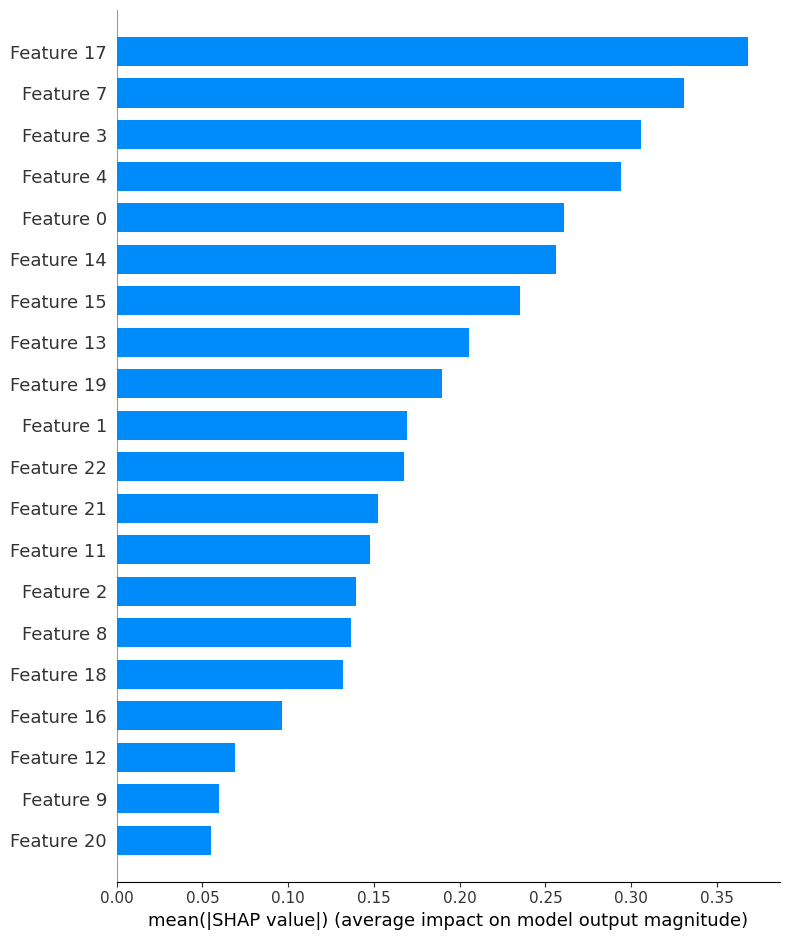

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

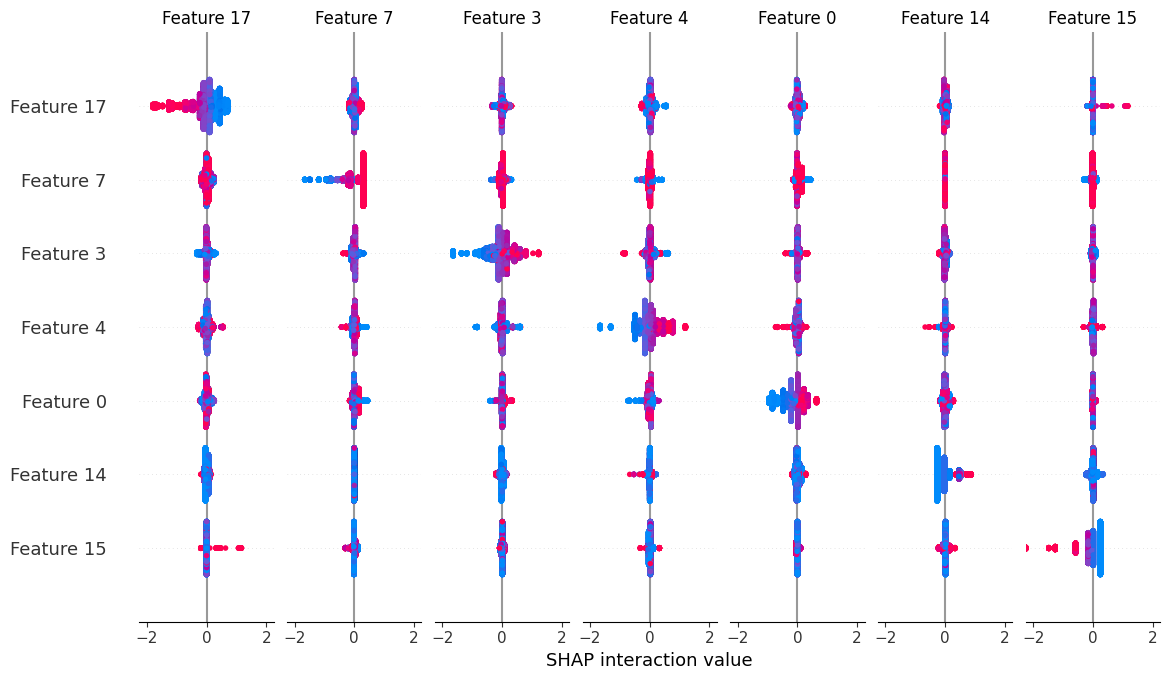

In [ ]:
shap.summary_plot(shap_interaction_values,X)

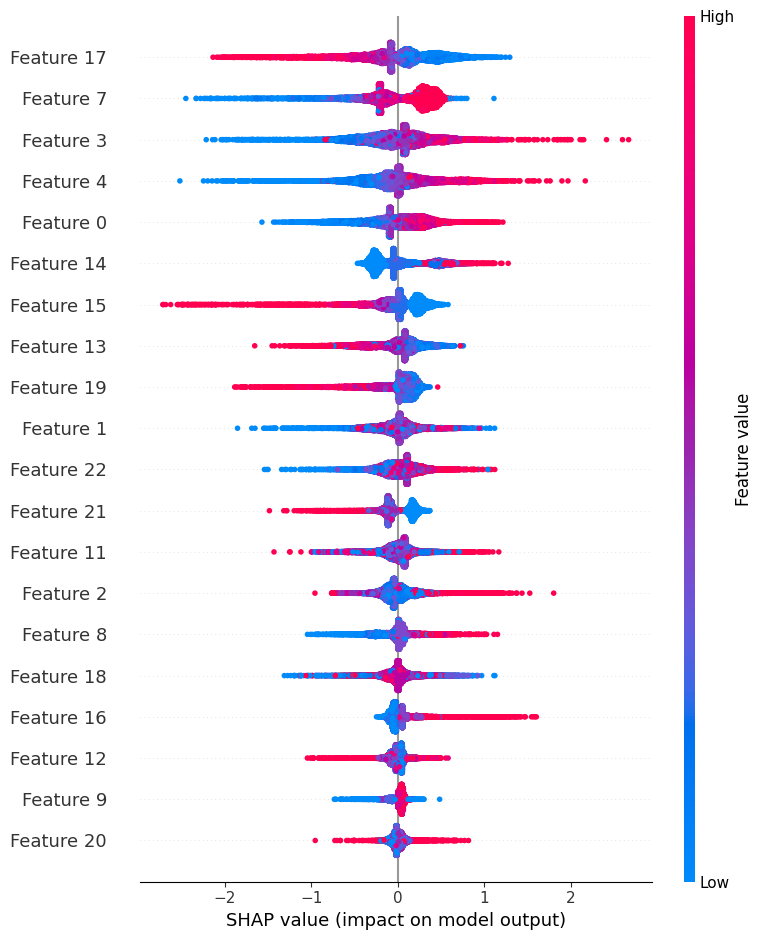

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
print(X.shape)

(10459, 23)


In [ ]:
shap.initjs()

In [ ]:
feature_names=['ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
#feature_names = X_test.columns.tolist()
target_names=['Good','Bad']
X_df = pd.DataFrame(X, columns=feature_names)

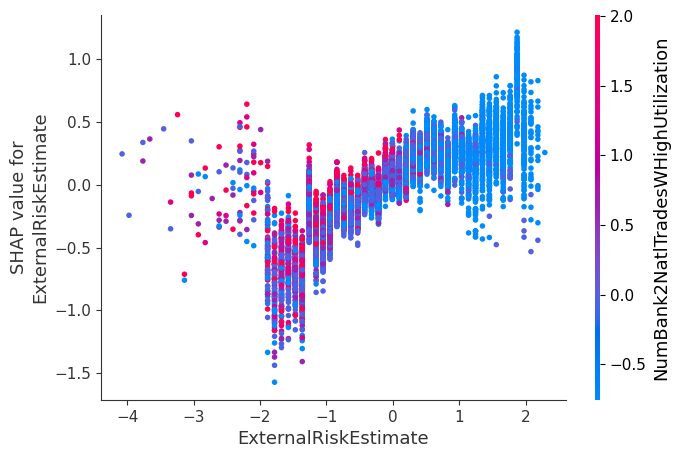

In [ ]:
shap.dependence_plot("ExternalRiskEstimate", shap_values, X_df)

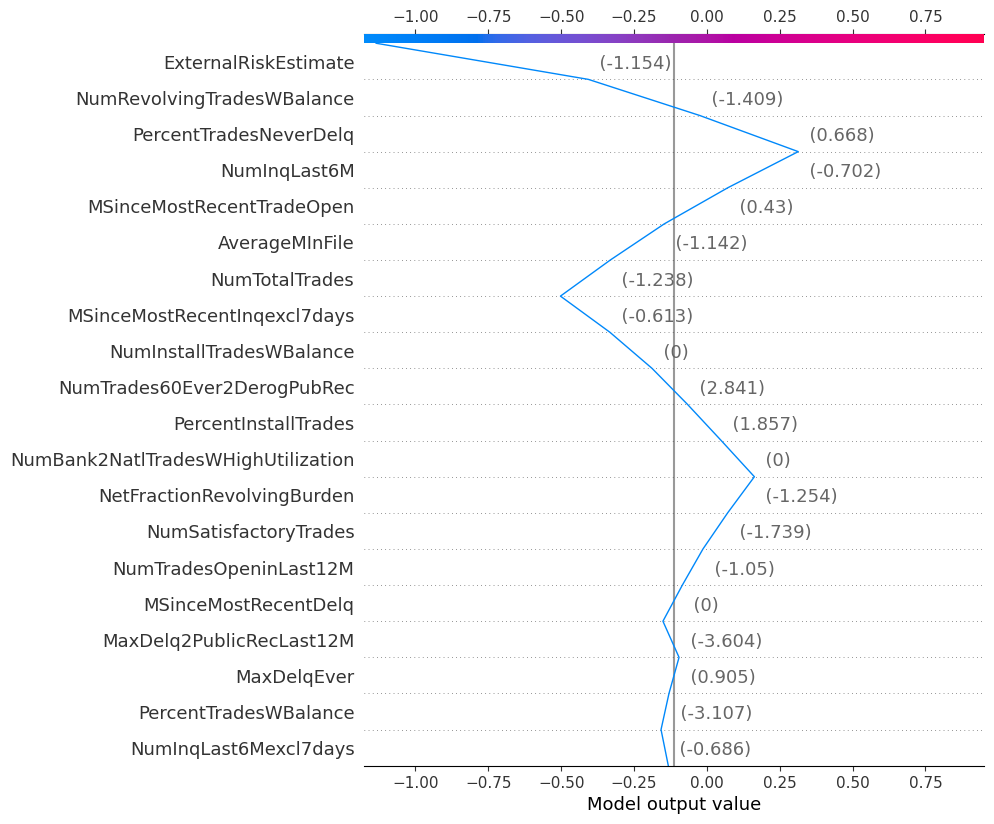

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[:1], X[1], feature_names=feature_names)

In [ ]:
feature_names=['ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
#feature_names = X_test.columns.tolist()
target_names=['Good','Bad']

In [ ]:
!pip install lime

In [ ]:
import lime

from lime.lime_tabular import LimeTabularExplainer  # Importing from the correct location

lime_explainer = LimeTabularExplainer(X_train, feature_names=feature_names, class_names=target_names, discretize_continuous=False)

In [ ]:
i = np.random.randint(0, X_test.shape[0])
i

632

In [ ]:
exp = lime_explainer.explain_instance(X_test[3], xgb_final.predict_proba, num_features=23)

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 841.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
from tensorflow.keras.losses import MSE as mean_squared_error # Using MSE alias

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
mse_loss = MeanSquaredError()


In [ ]:
import tensorflow as tf
# Define the custom loss
mse_loss = tf.keras.losses.MeanSquaredError()

def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
    # Reconstruction loss using the MeanSquaredError object
    reconstruction_loss = tf.reduce_mean(mse_loss(inputs, x_decoded_mean))
    # KL divergence
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    return tf.reduce_mean(reconstruction_loss + kl_loss)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

# Define the C-CHVAE architecture
class CCHVAE(Model):
    def __init__(self, input_dim, latent_dim=32, **kwargs):
        super(CCHVAE, self).__init__(**kwargs)
        # Encoder
        self.encoder_hidden = Dense(64, activation='relu')
        self.z_mean = Dense(latent_dim)
        self.z_log_var = Dense(latent_dim)

        # Decoder
        self.decoder_hidden = Dense(64, activation='relu')
        self.decoder_output = Dense(input_dim, activation='sigmoid')

        # Latent space parameters
        self.latent_dim = latent_dim

    def encode(self, x):
        """Encode inputs into latent space."""
        h = self.encoder_hidden(x)
        z_mean = self.z_mean(h)
        z_log_var = self.z_log_var(h)
        return z_mean, z_log_var

    def reparameterize(self, z_mean, z_log_var):
        """Reparameterization trick."""
        epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def decode(self, z):
        """Decode latent space into reconstructed inputs."""
        h_decoded = self.decoder_hidden(z)
        x_decoded = self.decoder_output(h_decoded)
        return x_decoded

    def call(self, inputs):
        """Forward pass."""
        z_mean, z_log_var = self.encode(inputs)
        z = self.reparameterize(z_mean, z_log_var)
        x_decoded = self.decode(z)
        return x_decoded, z_mean, z_log_var

    def train_step(self, data):
      """Custom training loop."""
      x = data  # Inputs
      mse_loss_fn = tf.keras.losses.MeanSquaredError()
      with tf.GradientTape() as tape:
          # Forward pass
          x_decoded, z_mean, z_log_var = self(data)
          # Reconstruction loss
          reconstruction_loss = tf.reduce_mean(mse_loss_fn(x, x_decoded))
          # KL divergence
          kl_loss = -0.5 * tf.reduce_mean(
              1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
          )
          # Total loss
          total_loss = reconstruction_loss + kl_loss

      # Apply gradients
      grads = tape.gradient(total_loss, self.trainable_weights)
      self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

      # Ensure valid tensor outputs
      return {
          "loss": float(total_loss.numpy()) if total_loss is not None else 0.0,
          "reconstruction_loss": float(reconstruction_loss.numpy()) if reconstruction_loss is not None else 0.0,
          "kl_loss": float(kl_loss.numpy()) if kl_loss is not None else 0.0,
      }



# Example usage
input_dim = X_train.shape[1]  # Ensure X_train is preprocessed
vae = CCHVAE(input_dim)




In [ ]:
print(f"Model compiled: {vae.compiled_loss is not None}")


Model compiled: True


In [ ]:

vae.compile(optimizer='adam', loss=lambda x, y: 0.0)


In [ ]:
import numpy as np
print(f"X_train shape: {X_train.shape}")
print(f"Contains NaN: {np.isnan(X_train).any()}")
X_train = np.nan_to_num(X_train)  # Replace NaN with 0


X_train shape: (8367, 23)
Contains NaN: False


In [ ]:
X_train = np.array(X_train)
# print(X_train.shape)


In [ ]:
import numpy as np
import pandas as pd
import lime
import lime.lime_tabular
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Assuming you already have your trained XGBoost model 'xgb_final'
# and your data X_train, X_test, y_train, y_test

def prepare_explainer(X_train, feature_names):
    """Prepare LIME explainer with training data."""
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=feature_names,
        class_names=['Bad', 'Good'],
        mode='classification'
    )
    return explainer

def explain_prediction(model, explainer, instance, feature_names, num_features=10):
    """Generate LIME explanation for a single instance."""

    # Define prediction function for LIME
    def predict_fn(x):
        return model.predict_proba(x)

    # Generate explanation
    explanation = explainer.explain_instance(
        instance,
        predict_fn,
        num_features=num_features
    )

    return explanation

def visualize_lime_explanation(explanation, title="Feature Importance"):
    """Visualize LIME explanation."""
    # Get feature importance data
    feature_importance = pd.DataFrame(
        explanation.as_list(),
        columns=['Feature', 'Impact']
    ).sort_values('Impact', ascending=True)

    # Create visualization
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Impact'])
    plt.title(title)
    plt.xlabel('Impact on Prediction')
    plt.tight_layout()
    return plt

def analyze_loan_application(instance, xgb_model, X_train, feature_names):
    """Analyze a single loan application."""

    # Prepare LIME explainer
    explainer = prepare_explainer(X_train, feature_names)

    # Get model prediction
    prediction = xgb_model.predict_proba([instance])[0]
    predicted_class = "Good" if prediction[1] > 0.5 else "Bad"

    # Generate LIME explanation
    lime_exp = explain_prediction(xgb_model, explainer, instance, feature_names)

    # Create visualization
    plot = visualize_lime_explanation(lime_exp,
                                    f"Feature Importance for {predicted_class} Loan Prediction")

    # Get feature importance scores
    feature_importance = pd.DataFrame(
        lime_exp.as_list(),
        columns=['Feature', 'Impact']
    ).sort_values('Impact', ascending=False)

    # Generate recommendations
    recommendations = generate_recommendations(feature_importance, predicted_class)

    return {
        'prediction': predicted_class,
        'confidence': max(prediction),
        'explanation': lime_exp,
        'feature_importance': feature_importance,
        'recommendations': recommendations,
        'visualization': plot
    }

def generate_recommendations(feature_importance, predicted_class):
    """Generate actionable recommendations based on LIME explanations."""
    recommendations = []

    if predicted_class == "Bad":
        # Focus on top negative factors
        negative_factors = feature_importance[feature_importance['Impact'] < 0]
        for _, row in negative_factors.head(3).iterrows():
            feature = row['Feature']
            impact = abs(row['Impact'])

            # Generate specific recommendations based on feature
            if "debt" in feature.lower():
                recommendations.append(f"Consider reducing {feature} as it has a significant negative impact")
            elif "income" in feature.lower():
                recommendations.append(f"Increasing {feature} could improve your application")
            elif "payment" in feature.lower():
                recommendations.append(f"Improve {feature} history to strengthen your application")
            else:
                recommendations.append(f"Focus on improving {feature} to increase approval chances")

    return recommendations

# Example usage
def main(X_train, feature_names, xgb_model, instance_to_explain):
    """Main function to analyze a loan application."""

    results = analyze_loan_application(
        instance=instance_to_explain,
        xgb_model=xgb_model,
        X_train=X_train,
        feature_names=feature_names
    )

    # Print results
    print(f"\nPrediction: {results['prediction']}")
    print(f"Confidence: {results['confidence']:.2f}")
    print("\nTop Features Contributing to Decision:")
    print(results['feature_importance'].head())
    print("\nRecommendations:")
    for rec in results['recommendations']:
        print(f"- {rec}")

    # Show visualization
    results['visualization'].show()

    return results



'\n# Assuming you have:\nfeature_names = list(X.columns)  # Your feature names\ninstance_to_explain = X_test_array[0]  # Single instance to explain\n\n# Run the analysis\nresults = main(\n    X_train=X_train_array,\n    feature_names=feature_names,\n    xgb_model=xgb_final,\n    instance_to_explain=instance_to_explain\n)\n'

In [ ]:
feature_names=['ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
#feature_names = X_test.columns.tolist()
target_names=['Good','Bad']


Prediction: Good
Confidence: 0.78

Top Features Contributing to Decision:
                                       Feature    Impact
0        0.32 < PercentTradesNeverDelq <= 0.67  0.152202
1                 NumSatisfactoryTrades > 0.53  0.082513
2          MSinceMostRecentInqexcl7days > 0.00  0.067742
3               -0.02 < AverageMInFile <= 0.49  0.051400
5  -0.89 < NetFractionRevolvingBurden <= -0.07  0.036842

Recommendations:


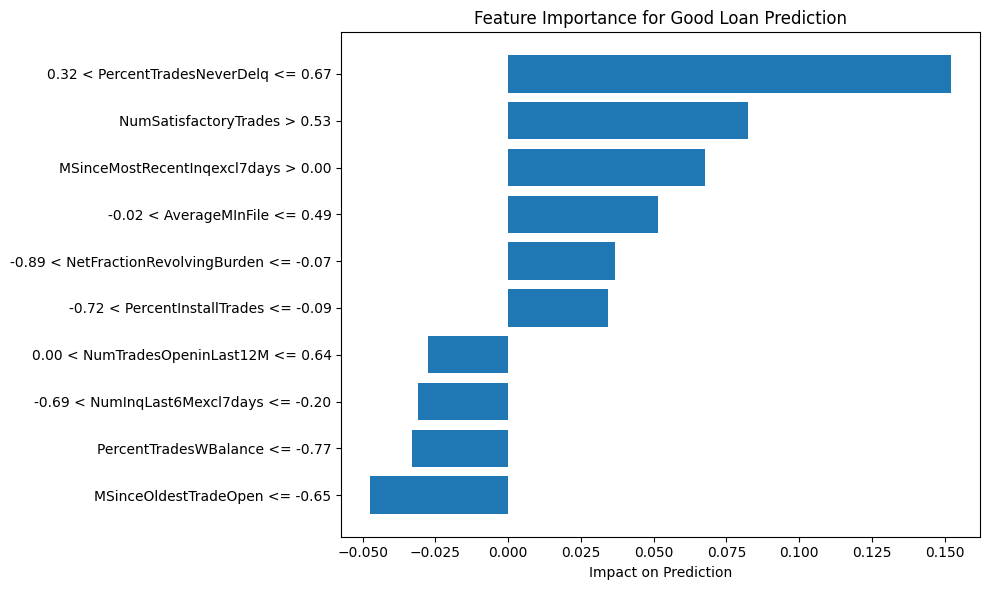

In [ ]:
# Example of how to use the code with your XGBoost model:

# Assuming you have:
#feature_names = list(X.columns)  # Your feature names
instance_to_explain = X_test_array[0]  # Single instance to explain

# Run the analysis
results = main(
    X_train=X_train_array,
    feature_names=feature_names,
    xgb_model=xgb_final,
    instance_to_explain=instance_to_explain
)


In [ ]:
import numpy as np
import pandas as pd
import lime
import lime.lime_tabular
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

class CCHVAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10, hidden_dim=20):
        super(CCHVAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_var = nn.Linear(hidden_dim, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + 1, hidden_dim),  # +1 for condition
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_var(h)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, condition):
        # Concatenate latent vector with condition
        z_cond = torch.cat([z, condition.unsqueeze(1)], dim=1)
        return self.decoder(z_cond)

    def forward(self, x, condition):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decode(z, condition), mu, log_var

def train_cchvae(model, X_train, y_train, epochs=100):
    """Train the C-CHVAE model."""
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    X_tensor = torch.FloatTensor(X_train)
    y_tensor = torch.FloatTensor(y_train)

    for epoch in range(epochs):
        # Forward pass
        recon_x, mu, log_var = model(X_tensor, y_tensor)

        # Calculate loss
        recon_loss = nn.MSELoss()(recon_x, X_tensor)
        kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        loss = recon_loss + 0.1 * kl_loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def generate_counterfactual(model, instance, xgb_model, target_class, max_iter=1000):
    """Generate counterfactual explanation using C-CHVAE."""
    # Ensure instance is 2D
    instance_tensor = torch.FloatTensor(instance).unsqueeze(0)  # Add batch dimension
    target_tensor = torch.FloatTensor([target_class]).unsqueeze(0)  # Add batch dimension

    # Get initial latent representation
    with torch.no_grad():
        mu, log_var = model.encode(instance_tensor)
        z_init = model.reparameterize(mu, log_var)

    # Create a new tensor with requires_grad=True
    z = torch.tensor(z_init.detach().numpy(), requires_grad=True)

    optimizer = torch.optim.Adam([z], lr=0.01)

    best_counterfactual = None
    best_loss = float('inf')

    for i in range(max_iter):
        try:
            # Generate counterfactual
            counterfactual = model.decode(z, target_tensor)

            # Get XGBoost prediction
            cf_numpy = counterfactual.detach().numpy()
            xgb_pred = xgb_model.predict_proba(cf_numpy)[0]
            pred_loss = torch.tensor(abs(xgb_pred[target_class] - 1.0), requires_grad=True)

            # Calculate sparsity and validity losses
            sparsity_loss = torch.norm(counterfactual - instance_tensor, p=1)
            validity_loss = pred_loss + 0.1 * sparsity_loss

            current_loss = validity_loss.item()
            if current_loss < best_loss:
                best_loss = current_loss
                best_counterfactual = counterfactual.detach().clone()

            # Optimize
            optimizer.zero_grad()
            validity_loss.backward()
            optimizer.step()

            if best_loss < 0.1:  # Early stopping if good counterfactual found
                break

        except Exception as e:
            print(f"Iteration error: {e}")
            continue

    if best_counterfactual is None:
        return instance_tensor.numpy().squeeze()

    return best_counterfactual.numpy().squeeze()

def main_comparison(X_train, X_test, y_train, y_test, xgb_model, feature_names, instance_idx=0):
    """Main function to run both explanations and compare them."""
    print("Starting comparison...")

    # Initialize and train C-CHVAE
    input_dim = len(feature_names)
    cchvae = CCHVAE(input_dim=input_dim)
    print("Training C-CHVAE...")
    train_cchvae(cchvae, X_train, y_train)

    # Put model in eval mode
    cchvae.eval()

    # Get instance to explain
    instance = X_test[instance_idx]
    print(f"Instance shape: {instance.shape}")

    # Get current prediction
    current_pred = xgb_model.predict(instance.reshape(1, -1))[0]
    target_class = 1 - current_pred  # Flip the prediction
    print(f"Current prediction: {current_pred}, Target class: {target_class}")

    # Generate LIME explanation
    print("Generating LIME explanation...")
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train,
        feature_names=feature_names,
        class_names=['Bad', 'Good'],
        mode='classification'
    )

    lime_exp = explainer.explain_instance(
        instance,
        xgb_model.predict_proba,
        num_features=len(feature_names)
    )

    # Generate counterfactual
    print("Generating counterfactual...")
    try:
        counterfactual = generate_counterfactual(
            cchvae,
            instance,
            xgb_model,
            target_class
        )
        print("Counterfactual generated successfully")
        print(f"Counterfactual shape: {counterfactual.shape}")
    except Exception as e:
        print(f"Error generating counterfactual: {e}")
        counterfactual = instance

    # Compare explanations
    print("Comparing explanations...")
    comparison = compare_explanations(
        instance,
        lime_exp,
        counterfactual,
        feature_names,
        xgb_model
    )

    # Generate visualization
    viz = visualize_comparison(comparison)

    return {
        'lime_explanation': lime_exp,
        'counterfactual': counterfactual,
        'comparison': comparison,
        'visualization': viz
    }

def compare_explanations(instance, lime_exp, counterfactual, feature_names, xgb_model):
    """Compare LIME and C-CHVAE explanations."""
    # Get LIME feature importance
    lime_features = pd.DataFrame(
        lime_exp.as_list(),
        columns=['Feature', 'LIME_Impact']
    )

    # Calculate counterfactual changes
    cf_changes = pd.DataFrame({
        'Feature': feature_names,
        'CF_Change': counterfactual - instance
    })

    # Merge explanations
    comparison = pd.merge(lime_features, cf_changes, on='Feature')

    # Calculate additional metrics
    comparison['Actionability'] = 1 / (1 + abs(comparison['CF_Change']))
    comparison['Agreement'] = comparison.apply(
        lambda x: 1 if (x['LIME_Impact'] * x['CF_Change']) < 0 else 0,
        axis=1
    )

    return comparison

# Example usage with debug prints:
"""
try:
    print("Starting comparison process...")
    results = main_comparison(
        X_train=X_train_array,
        X_test=X_test_array,
        y_train=y_train_array,
        y_test=y_test_array,
        xgb_model=xgb_final,
        feature_names=feature_names
    )

    print("\nComparison Results:")
    print(results['comparison'])

    print("\nShape Analysis:")
    print(f"LIME Explanation Features: {len(results['lime_explanation'].as_list())}")
    print(f"Counterfactual Shape: {results['counterfactual'].shape}")

    # Show visualization
    plt.show()

except Exception as e:
    print(f"Error in comparison process: {e}")
    import traceback
    traceback.print_exc()
"""

'\ntry:\n    print("Starting comparison process...")\n    results = main_comparison(\n        X_train=X_train_array,\n        X_test=X_test_array,\n        y_train=y_train_array,\n        y_test=y_test_array,\n        xgb_model=xgb_final,\n        feature_names=feature_names\n    )\n    \n    print("\nComparison Results:")\n    print(results[\'comparison\'])\n    \n    print("\nShape Analysis:")\n    print(f"LIME Explanation Features: {len(results[\'lime_explanation\'].as_list())}")\n    print(f"Counterfactual Shape: {results[\'counterfactual\'].shape}")\n    \n    # Show visualization\n    plt.show()\n    \nexcept Exception as e:\n    print(f"Error in comparison process: {e}")\n    import traceback\n    traceback.print_exc()\n'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the HELOC dataset
df1 = pd.read_csv("heloc_dataset.csv")
df1.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                      83                     2  ...                    43   
1                     100                    -7  ...                    67   
2                     100                    -7  ...                    44   
3                      93                    76  ...                    57   
4                     100                    -7  ...                    25   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  
3                                   3                     91  
4                                   0                     80  

[5 rows x 24 columns]

In [ ]:
# Data Cleaning and Preprocessing
# 1. Replace special values with NaN
special_values = [-9, -8, -7]
df1 = df1.replace(special_values, np.nan)

# 2. Impute missing values using SimpleImputer
num_imputer = SimpleImputer(strategy='mean')  # For numerical features
# Apply imputation to numerical columns (excluding 'RiskPerformance' if it's your target)
numeric_cols = df1.select_dtypes(include=['number']).columns.difference(['RiskPerformance'])
for col in numeric_cols:
    df1[col] = num_imputer.fit_transform(df1[[col]]).ravel()

# 3. Convert target variable to binary (if needed)
df1['RiskPerformance'] = df1['RiskPerformance'].map({'Good': 1, 'Bad': 0})

# 4. Feature scaling (using StandardScaler)
# Assuming 'RiskPerformance' is your target variable and other columns are features
y = df1['RiskPerformance']
X = df1.drop('RiskPerformance', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Now, X contains the preprocessed features, and y contains the target variable

In [ ]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# Load your dataset (HELOC dataset)
# X, y = load_heloc_data()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Train LGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 3996, number of negative: 4371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 8367, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477591 -> initscore=-0.089698
[LightGBM] [Info] Start training from score -0.089698


LGBMClassifier()

In [ ]:
df1.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                0                  55.0                  144.0   
1                0                  61.0                   58.0   
2                0                  67.0                   66.0   
3                0                  66.0                  169.0   
4                0                  81.0                  333.0   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                        4.0            84.0                   20.0   
1                       15.0            41.0                    2.0   
2                        5.0            24.0                    9.0   
3                        1.0            73.0                   28.0   
4                       27.0           132.0                   12.0   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                          3.0                          0.0   
1                          4.0                          4.0   
2                          0.0                          0.0   
3                          1.0                          1.0   
4                          0.0                          0.0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                    83.0              2.000000  ...                  43.0   
1                   100.0             21.879547  ...                  67.0   
2                   100.0             21.879547  ...                  44.0   
3                    93.0             76.000000  ...                  57.0   
4                   100.0             21.879547  ...                  25.0   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                           0.0           0.0                    0.0   
1                           0.0           0.0                    0.0   
2                           0.0           4.0                    4.0   
3                           0.0           5.0                    4.0   
4                           0.0           1.0                    1.0   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                        33.0                 68.537973   
1                         0.0                 68.537973   
2                        53.0                 66.000000   
3                        72.0                 83.000000   
4                        51.0                 89.000000   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                         8.0                  1.000000   
1                         0.0                  2.484906   
2                         4.0                  2.000000   
3                         6.0                  4.000000   
4                         3.0                  1.000000   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                             1.00000                   69.0  
1                             1.09227                    0.0  
2                             1.00000                   86.0  
3                             3.00000                   91.0  
4                             0.00000                   80.0  

[5 rows x 24 columns]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Load and preprocess the HELOC dataset
df1 = pd.read_csv("heloc_dataset.csv")

# Replace special values with NaN and impute missing values
special_values = [-9, -8, -7]
df1 = df1.replace(special_values, np.nan)
num_imputer = SimpleImputer(strategy='mean')
numeric_cols = df1.select_dtypes(include=['number']).columns.difference(['RiskPerformance'])
for col in numeric_cols:
    df1[col] = num_imputer.fit_transform(df1[[col]]).ravel()

# Convert 'RiskPerformance' to binary (Good -> 1, Bad -> 0)
df1['RiskPerformance'] = df1['RiskPerformance'].map({'Good': 1, 'Bad': 0})

# Feature scaling
y = df1['RiskPerformance']
X = df1.drop('RiskPerformance', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the C-CHVAE Model
class CCHVAE(Model):
    def __init__(self, input_dim, latent_dim=32, **kwargs):
        super(CCHVAE, self).__init__(**kwargs)
        # Encoder
        self.encoder_hidden = Dense(64, activation='relu')
        self.z_mean = Dense(latent_dim)
        self.z_log_var = Dense(latent_dim)

        # Decoder
        self.decoder_hidden = Dense(64, activation='relu')
        self.decoder_output = Dense(input_dim, activation='sigmoid')

        self.latent_dim = latent_dim

    def encode(self, x):
        """Encode inputs into latent space."""
        h = self.encoder_hidden(x)
        z_mean = self.z_mean(h)
        z_log_var = self.z_log_var(h)
        return z_mean, z_log_var

    def reparameterize(self, z_mean, z_log_var):
        """Reparameterization trick."""
        epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def decode(self, z):
        """Decode latent space into reconstructed inputs."""
        h_decoded = self.decoder_hidden(z)
        x_decoded = self.decoder_output(h_decoded)
        return x_decoded

    def call(self, inputs):
        """Forward pass."""
        z_mean, z_log_var = self.encode(inputs)
        z = self.reparameterize(z_mean, z_log_var)
        x_decoded = self.decode(z)
        self.add_loss(self.compute_vae_loss(inputs, x_decoded, z_mean, z_log_var))
        return x_decoded

    def compute_vae_loss(self, inputs, x_decoded, z_mean, z_log_var):
        """Custom VAE loss function."""
        reconstruction_loss = tf.keras.losses.MeanSquaredError()(inputs, x_decoded)
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        total_loss = reconstruction_loss + kl_loss
        return total_loss

# 3. Train the C-CHVAE model
input_dim = X_train.shape[1]
vae = CCHVAE(input_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam())
history = vae.fit(X_train, epochs=50, batch_size=32, validation_split=0.2)

# 4. Generate Counterfactual Explanations
def generate_counterfactual(instance, model):
    """Generate a counterfactual for the given input instance."""
    instance = instance.reshape(1, -1)  # Reshape to feed it into the model
    z_mean, z_log_var = model.encode(instance)
    z = model.reparameterize(z_mean, z_log_var)
    counterfactual = model.decode(z)
    return counterfactual.numpy()

# Select an instance from the test set to generate a counterfactual
example_instance = X_test[0]
counterfactual = generate_counterfactual(example_instance, vae)

# Print original and counterfactual instance
print("Original Instance:", example_instance)
print("Counterfactual:", counterfactual)


Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2300 - val_loss: 0.9639
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0021 - val_loss: 0.9158
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9493 - val_loss: 0.8868
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9795 - val_loss: 0.8806
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9515 - val_loss: 0.8707
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9239 - val_loss: 0.8667
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9143 - val_loss: 0.8596
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9147 - val_loss: 0.8569
Epoch 9/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9186 - val_loss: 0.8543
Epoch 10/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9128 - val_loss: 0.8507
Epoch 11/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8997 - val_loss: 0.8463
Epoch 12/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
example_instance = example_instance.reshape(1, -1)

example_instance = scaler.inverse_transform(example_instance)
counterfactual = scaler.inverse_transform(counterfactual)

print("Original Instance:", example_instance)
print("Counterfactual:", counterfactual)

Original Instance: [[ 69.         148.           4.          66.          41.
    0.           0.         100.          21.87954681   7.
    8.          41.           4.          10.           2.47771883
    1.           1.          32.          60.           7.
    3.           1.          50.        ]]
Counterfactual: [[ 77.67735    200.78009      9.588492    78.778915    31.76439
    0.5814044    0.38476813  99.95956     23.303774     6.9057193
    7.9569554   34.688496     3.536962    43.27482      5.1036344
    1.4617239    1.4026854   35.009167    82.99826      4.1389866
    3.9155996    1.0948062   67.64149   ]]


In [ ]:
example_instance = example_instance.ravel()
example_instance

array([ 69.        , 148.        ,   4.        ,  66.        ,
        41.        ,   0.        ,   0.        , 100.        ,
        21.87954681,   7.        ,   8.        ,  41.        ,
         4.        ,  10.        ,   2.47771883,   1.        ,
         1.        ,  32.        ,  60.        ,   7.        ,
         3.        ,   1.        ,  50.        ])

In [ ]:
# Extract feature names (all columns except the target column)
feature_names = df1.drop('RiskPerformance', axis=1).columns.to_list()

In [ ]:
import numpy as np
import pandas as pd

# Original and Counterfactual instances (already given)
original_instance = example_instance

counterfactual = counterfactual

# Calculate changes
absolute_change = counterfactual - original_instance
percentage_change = (absolute_change / (np.abs(original_instance) )) * 100

# Create DataFrame for feature comparison
df_changes = pd.DataFrame({
    'Feature': feature_names,
    'Original': original_instance,
    'Counterfactual': counterfactual.flatten(),
    'Absolute Change': absolute_change.flatten(),
    'Percentage Change (%)': percentage_change.flatten()
})

# Sort by the most significant absolute change
df_changes_sorted = df_changes.sort_values(by='Absolute Change', ascending=False)
df_changes_sorted


<ipython-input-41-fb11b4c483e2>:11: RuntimeWarning: divide by zero encountered in divide
  percentage_change = (absolute_change / (np.abs(original_instance) )) * 100


Feature    Original  Counterfactual  \
1                MSinceOldestTradeOpen  148.000000      214.087280   
13                PercentInstallTrades   10.000000       34.619045   
22               PercentTradesWBalance   50.000000       66.449852   
3                       AverageMInFile   66.000000       78.909645   
18            NetFractionInstallBurden   60.000000       68.802094   
0                 ExternalRiskEstimate   69.000000       76.539871   
2            MSinceMostRecentTradeOpen    4.000000        9.588493   
17          NetFractionRevolvingBurden   32.000000       34.858555   
15                        NumInqLast6M    1.000000        1.639066   
5          NumTrades60Ever2DerogPubRec    0.000000        0.581406   
16               NumInqLast6Mexcl7days    1.000000        1.553028   
6          NumTrades90Ever2DerogPubRec    0.000000        0.384767   
8                 MSinceMostRecentDelq   21.879547       22.053415   
21  NumBank2NatlTradesWHighUtilization    1.000000        1.095457   
14        MSinceMostRecentInqexcl7days    2.477719        2.478157   
9             MaxDelq2PublicRecLast12M    7.000000        6.648512   
10                         MaxDelqEver    8.000000        7.514208   
20            NumInstallTradesWBalance    3.000000        2.493984   
12              NumTradesOpeninLast12M    4.000000        3.462922   
7               PercentTradesNeverDelq  100.000000       99.047966   
19          NumRevolvingTradesWBalance    7.000000        4.936112   
11                      NumTotalTrades   41.000000       34.574310   
4                NumSatisfactoryTrades   41.000000       31.821993   

    Absolute Change  Percentage Change (%)  
1         66.087280              44.653568  
13        24.619045             246.190453  
22        16.449852              32.899704  
3         12.909645              19.560068  
18         8.802094              14.670156  
0          7.539871              10.927350  
2          5.588493             139.712334  
17         2.858555               8.932984  
15         0.639066              63.906634  
5          0.581406                    inf  
16         0.553028              55.302835  
6          0.384767                    inf  
8          0.173868               0.794662  
21         0.095457               9.545720  
14         0.000438               0.017696  
9         -0.351488              -5.021252  
10        -0.485792              -6.072402  
20        -0.506016             -16.867216  
12        -0.537078             -13.426954  
7         -0.952034              -0.952034  
19        -2.063888             -29.484109  
11        -6.425690             -15.672414  
4         -9.178007             -22.385383

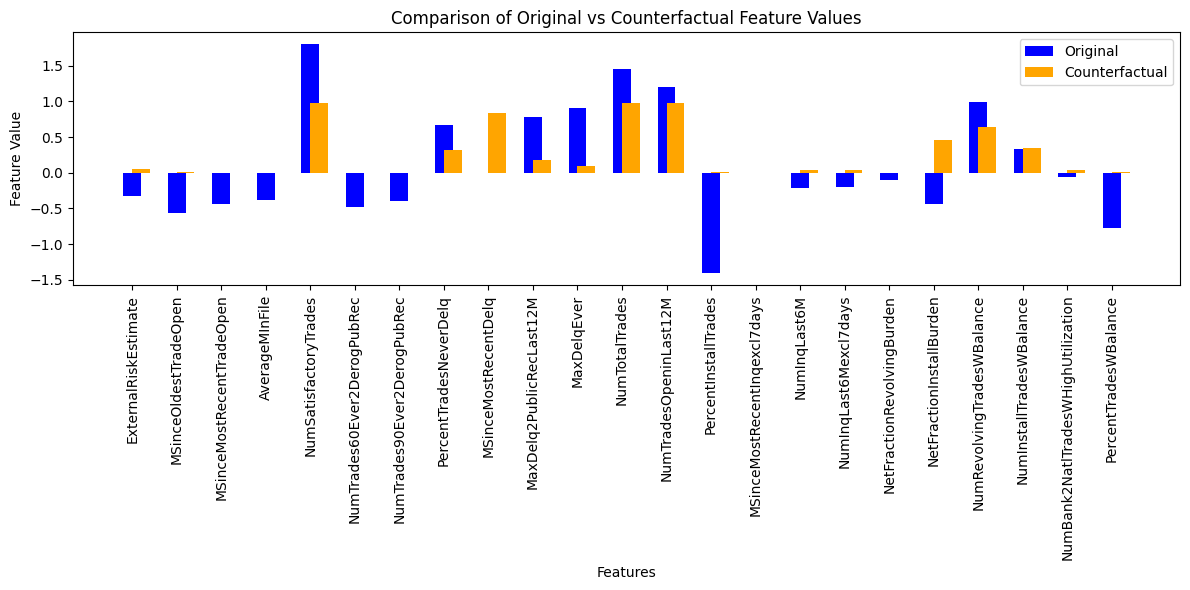

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x = range(len(feature_names))  # Use feature indices for plotting

# Plot bars for each feature (use their names)
plt.bar(x, original_instance, width=0.4, label='Original', align='center', color='blue')
plt.bar(x, counterfactual, width=0.4, label='Counterfactual', align='edge', color='orange')

# Replace x-axis indices with feature names
plt.xticks(x, feature_names, rotation=90)

plt.xlabel('Features')
plt.ylabel('Feature Value')
plt.title('Comparison of Original vs Counterfactual Feature Values')
plt.legend()
plt.tight_layout()  # Ensures labels don't get cut off
plt.show()


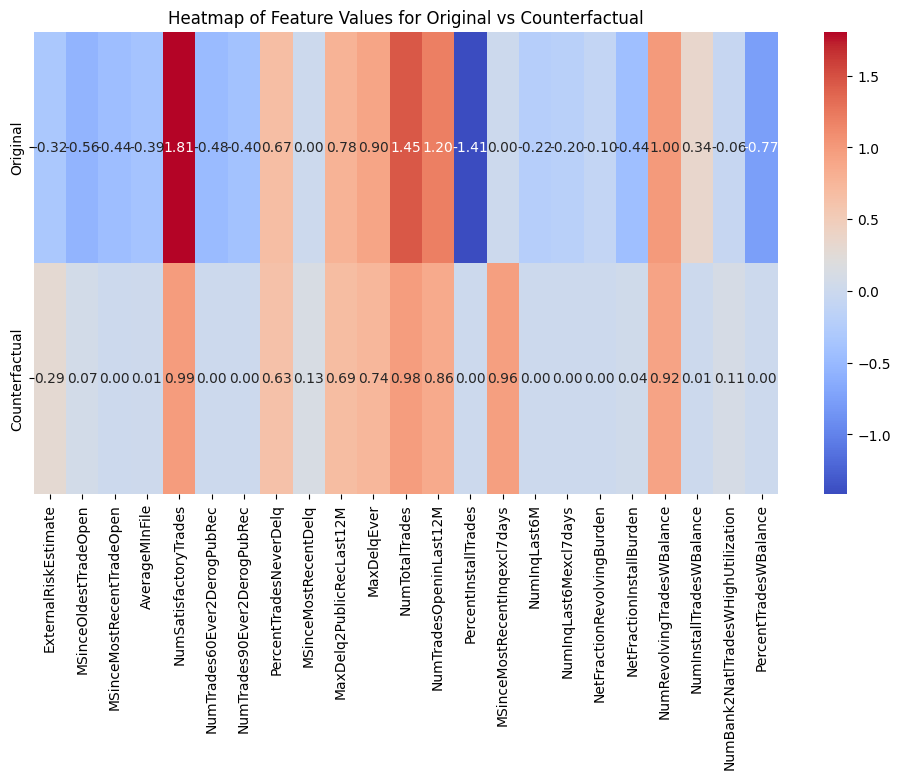

In [ ]:
import seaborn as sns

original_instance = example_instance
counterfactual = counterfactual.flatten()

# Create a DataFrame for the heatmap
df_heatmap = pd.DataFrame([original_instance, counterfactual],
                          index=['Original', 'Counterfactual'],
                          columns=feature_names)

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Values for Original vs Counterfactual')
plt.show()


In [ ]:
# Sort by absolute change
most_important_features = df_changes_sorted[['Feature', 'Absolute Change', 'Percentage Change (%)']]
top_features = most_important_features.head(5)  # Top 5 most important features

print("Top 5 most important features for the counterfactual flip:")
print(top_features)


Top 5 most important features for the counterfactual flip:
                     Feature  Absolute Change  Percentage Change (%)
1      MSinceOldestTradeOpen        66.087280              44.653568
13      PercentInstallTrades        24.619045             246.190453
22     PercentTradesWBalance        16.449852              32.899704
3             AverageMInFile        12.909645              19.560068
18  NetFractionInstallBurden         8.802094              14.670156


In [ ]:
for index, row in df_changes_sorted.head(5).iterrows():
    feature_name = row['Feature']
    original_val = row['Original']
    counterfactual_val = row['Counterfactual']
    change_percent = row['Percentage Change (%)']
    if change_percent > 0:
        change_type = 'increase'
    else:
        change_type = 'decrease'
    print(f"Change {feature_name} from {original_val:.2f} to {counterfactual_val:.2f} ({change_type} of {abs(change_percent):.2f}%).")


Change MSinceOldestTradeOpen from 148.00 to 214.09 (increase of 44.65%).
Change PercentInstallTrades from 10.00 to 34.62 (increase of 246.19%).
Change PercentTradesWBalance from 50.00 to 66.45 (increase of 32.90%).
Change AverageMInFile from 66.00 to 78.91 (increase of 19.56%).
Change NetFractionInstallBurden from 60.00 to 68.80 (increase of 14.67%).


In [ ]:
! pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.8 MB/s eta 0:00:00


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

# === 1. Data Preparation ===

# Load the HELOC dataset
df1 = pd.read_csv("heloc_dataset.csv")

# Data Cleaning and Preprocessing
special_values = [-9, -8, -7]
df1 = df1.replace(special_values, np.nan)

# Impute missing values
num_imputer = SimpleImputer(strategy='mean')
numeric_cols = df1.select_dtypes(include=['number']).columns.difference(['RiskPerformance'])
for col in numeric_cols:
    df1[col] = num_imputer.fit_transform(df1[[col]]).ravel()

# Convert the target variable
df1['RiskPerformance'] = df1['RiskPerformance'].map({'Good': 1, 'Bad': 0})

# Split features and labels
y = df1['RiskPerformance']
X = df1.drop('RiskPerformance', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 2. Train a Classifier (Optional) ===

# Train an XGBoost classifier (can be replaced with other models)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get predictions (not used in ProtoDash but useful for evaluation)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy * 100:.2f}%")



XGBoost Model Accuracy: 68.12%


In [ ]:
# === 3. ProtoDash Implementation ===

from sklearn_extra.cluster import KMedoids

# Select the subset of points from which prototypes will be extracted (use training set)
X_proto_selection = X_train

# Use K-Medoids to find prototypes (alternatively, you can use ProtoDash if available)
n_prototypes = 10  # Number of prototypes to select
kmedoids = KMedoids(n_clusters=n_prototypes, random_state=42)
kmedoids.fit(X_proto_selection)

# Get the indices of the prototypes
prototypes_indices = kmedoids.medoid_indices_
prototypes = X_proto_selection[prototypes_indices]

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 5 

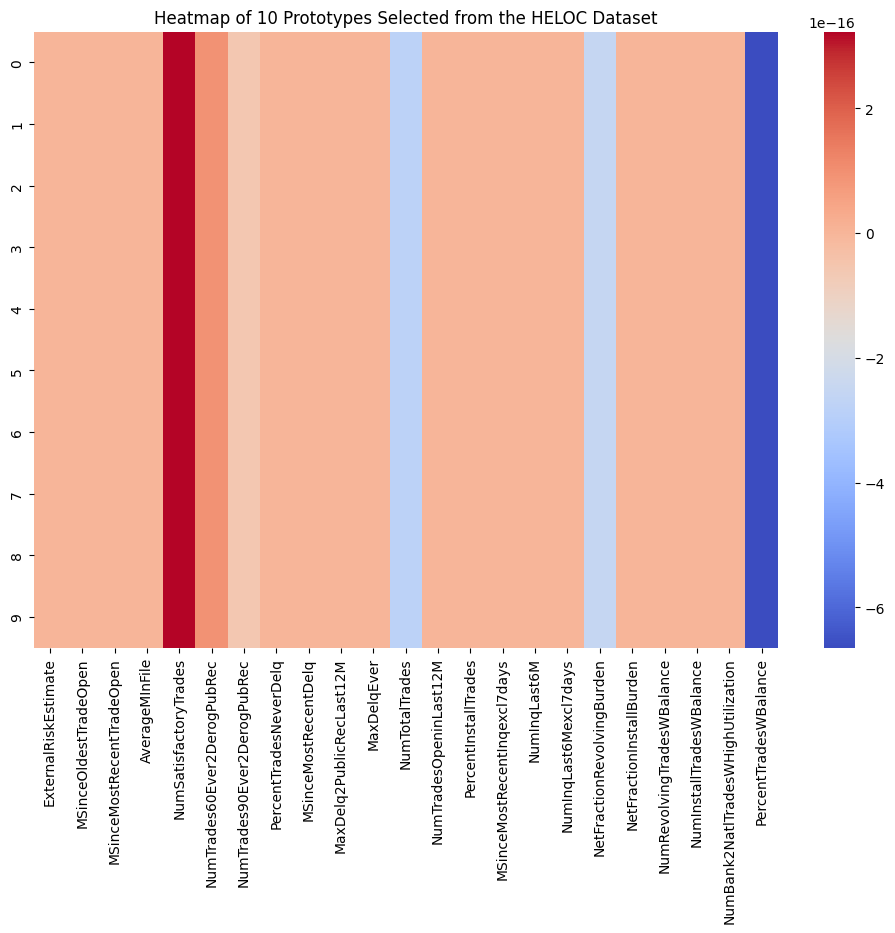

Indices of Prototypes Selected: [4863  991 4835  999 7166 4798  976 7162 1032  986]

Prototypes (Scaled Values):
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.23032894e-16  9.22574376e-17 -5.75334113e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.81323425e-16
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.55541087e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.64478556e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.23032894e-16  9.22574376e-17 -5.75334113e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.81323425e-16
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.55541087e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.64478556e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.23032894e-16  9.22574376e-17 -5.75334113e-17  0.00000

In [ ]:
# === 4. Visualization of Prototypes ===

# Visualize the original data and the prototypes
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(prototypes, columns=X.columns), annot=False, cmap='coolwarm', cbar=True)
plt.title(f'Heatmap of {n_prototypes} Prototypes Selected from the HELOC Dataset')
plt.show()

# Print the indices and prototype points
print("Indices of Prototypes Selected:", prototypes_indices)
print("\nPrototypes (Scaled Values):\n", prototypes)

# If you want to convert the prototypes back to the original feature space
prototypes_original_space = scaler.inverse_transform(prototypes)
print("\nPrototypes (Original Feature Space):\n", prototypes_original_space)


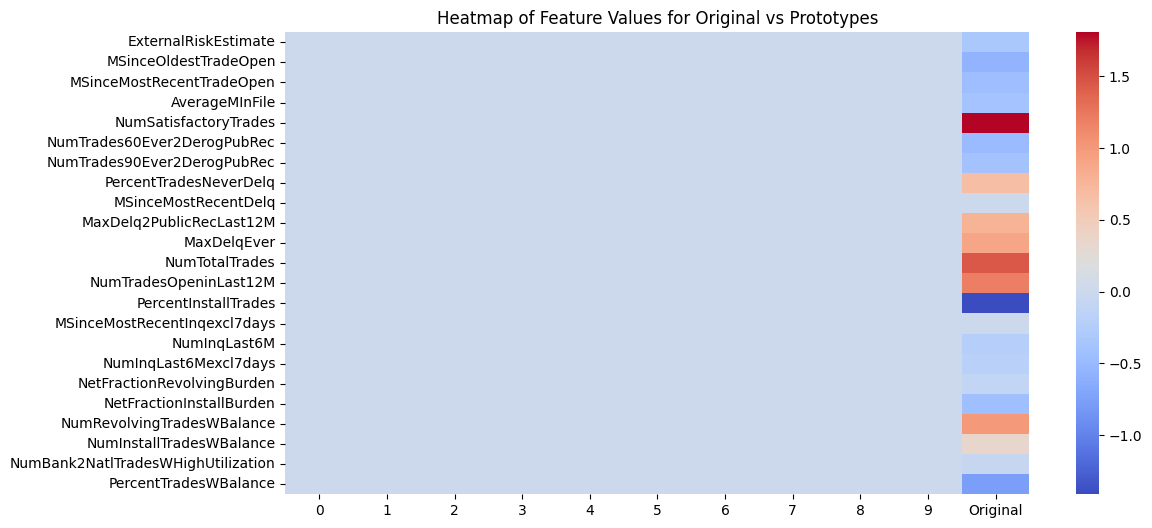

In [ ]:
# === 5. Compare Original Instance with the Prototypes ===

# Randomly select one instance from the test set to compare against the prototypes
original_instance = X_test[0]  # First instance from the test set

# Create a heatmap comparing the original instance with prototypes
df_heatmap = pd.DataFrame(prototypes, columns=X.columns).T
df_heatmap['Original'] = original_instance

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, annot=False, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Values for Original vs Prototypes')
plt.show()